In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pycountry    # finding country names
import difflib      # quanitfying string differences

In [204]:
def get_closest_iso3_code(country_name):
    
    if "jda" in country_name.lower():
        return "JDA"
    
    if "turkey" in country_name.lower():
        return "TUR"
    
    # Create a dictionary to map names to country objects
    name_to_country = {}

    # Iterate through all countries
    for country in pycountry.countries:
        # Add official name to the dictionary
        name_to_country[country.name] = country
        # Add common name to the dictionary if it exists
        if hasattr(country, 'common_name'):
            name_to_country[country.common_name] = country

    # Get all possible country names (official and common)
    country_names = list(name_to_country.keys())

    # Find the closest match
    closest_match = difflib.get_close_matches(country_name, country_names, n=1, cutoff=0.6)

    if closest_match:
        # Get the country object from the closest match
        country = name_to_country[closest_match[0]]
        return country.alpha_3

    

    return None

In [215]:
production = pd.read_csv(
    './data/upstream_weekly-field_annual_production_kbd_2015-2023.csv'
)

C:\Users\jake.stanger\AppData\Local\Temp\ipykernel_38724\1404216268.py:1: DtypeWarning: Columns (64,70,81,85,93,94,95,96,98,99,100,102,104,105,106,107,108,109,110,111,112,113,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  production = pd.read_csv(


In [216]:
production = production[production['field_is_top_level']=='Y']
# production['iso'] = production['country_name'].apply(get_closest_iso3_code)

In [217]:
country_name = 'Turkey'
country_iso = get_closest_iso3_code(country_name)
print(country_iso)

TUR


In [277]:
volume = production.groupby(
    ['year','iso_3166_1_alpha_3_code','field_oil_gas']
).agg(
    volume=('metric_value','sum'),
    num_fields=('field_name','nunique')
)
volume = volume.reset_index()
volume = volume.set_index('year')

In [280]:
volume[volume['iso_3166_1_alpha_3_code']==country_iso]

,iso_3166_1_alpha_3_code,field_oil_gas,volume,num_fields
year,,,,
2015,TUR,Gas,1.271882,6
2015,TUR,Oil,51.298965,17
2016,TUR,Gas,0.886090,7
2016,TUR,Oil,51.792735,17
2017,TUR,Gas,0.514994,8
2017,TUR,Oil,51.373134,17
2018,TUR,Gas,0.987470,8
2018,TUR,Oil,56.765378,18
2019,TUR,Gas,0.800875,8


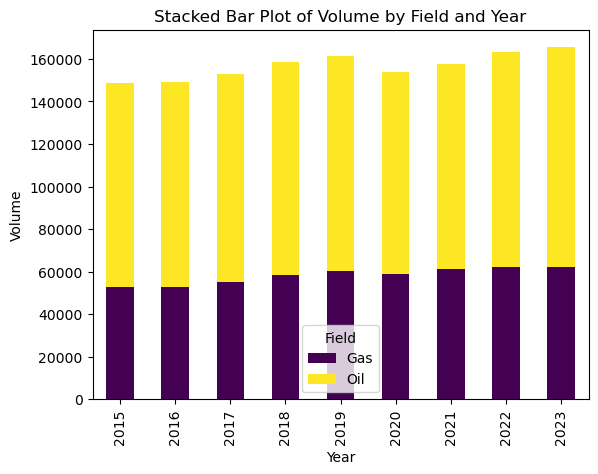

In [284]:
# Pivot the DataFrame
pivot_df = volume.pivot_table(index='year', columns='field_oil_gas', values='volume', aggfunc='sum')

# Plotting
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Stacked Bar Plot of Volume by Field and Year')
plt.legend(title='Field')
plt.show()

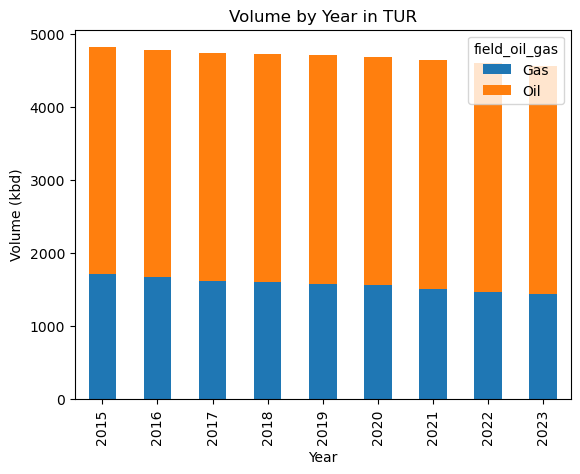

In [241]:
# Group by year and field, then sum the vol values
grouped_df = volume.groupby(['year', 'field_oil_gas']).sum().reset_index()

# Pivot the DataFrame
pivot_df = grouped_df.pivot(index='year', columns='field_oil_gas', values='num_fields')

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Volume (kbd)')
plt.title('Volume by Year in ' + country_iso)

# Show plot
plt.show()

In [181]:
list(production.columns)


['id_field_metrics',
 'id_field',
 'field_name',
 'id_field_group',
 'field_group',
 'field_is_top_level',
 'field_is_discovery',
 'id_country',
 'country_name',
 'id_metric',
 'metric_name',
 'id_unit',
 'unit',
 'id_year',
 'year',
 'year_actual_forecast',
 'year_is_current',
 'id_produced_remaining',
 'produced_remaining',
 'id_commercial_technical',
 'commercial_technical',
 'commercial_technical_breakdown',
 'prms_commercial_subcommercial',
 'prms_breakdown',
 'id_product',
 'liquid_gas',
 'liquid_gas_breakdown',
 'id_category',
 'category',
 'category_breakdown',
 'id_price_deck',
 'price_deck',
 'price_deck_long_term_brent',
 'id_real_nominal',
 'real_nominal',
 'id_discount',
 'discount_rate',
 'metric_value',
 'metric_short_code',
 'metric_order',
 'id_theme',
 'unit_short_code',
 'unit_metric_imperial',
 'metric_is_volume',
 'metric_can_be_summed',
 'iso_3166_1_alpha_3_code',
 'id_super_region',
 'super_region',
 'id_region',
 'region',
 'id_sector',
 'sector_name',
 'sector_